In [10]:
import sys
import numpy as np
sys.path.append('../../../nn')
from mynn import *
from mydata import *
from datetime import datetime

import matplotlib as mpl 
from matplotlib.lines import Line2D 
# mpl.use('TkAgg')
import matplotlib.pyplot as plt

plt.rc("figure", dpi=300)           # High-quality figure ("dots-per-inch")
plt.rc("text", usetex=True)         # Crisp axis ticks
plt.rc("font", family="serif")      # Crisp axis labels
plt.rc("legend", edgecolor='none')  # No boxes around legends

plt.rc("figure",facecolor="#ffffff")
plt.rc("axes",facecolor="#ffffff",edgecolor="#000000",labelcolor="#000000")
plt.rc("savefig",facecolor="#ffffff")
plt.rc("text",color="#000000")
plt.rc("xtick",color="#000000")
plt.rc("ytick",color="#000000")

color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

M = 20000
N_neurons = 256
layers    = 4
batch_size = 16


N = 200
ntrain = M//2
N_theta = 100


problem = "adv"

xgrid = np.linspace(0,2*np.pi,N)
dx    = xgrid[1] - xgrid[0]



model = torch.load("DeepFFONetNet_" + str(N_neurons) + "_4Nd_" + str(ntrain) + ".model", map_location=device)
model.to(device)

trunk = model.trunk_forward().detach().cpu().numpy()
U, S, V = np.linalg.svd(trunk, full_matrices=False)


DeepONetPCA_data = np.zeros((N, 2*4))
for i in range(4):
    DeepONetPCA_data[:,2*i]   = trunk[:, i]
    DeepONetPCA_data[:,2*i+1] = U[:, i]
    
np.save("DeepONetPCA_data.npy", DeepONetPCA_data)

## Load data and plot

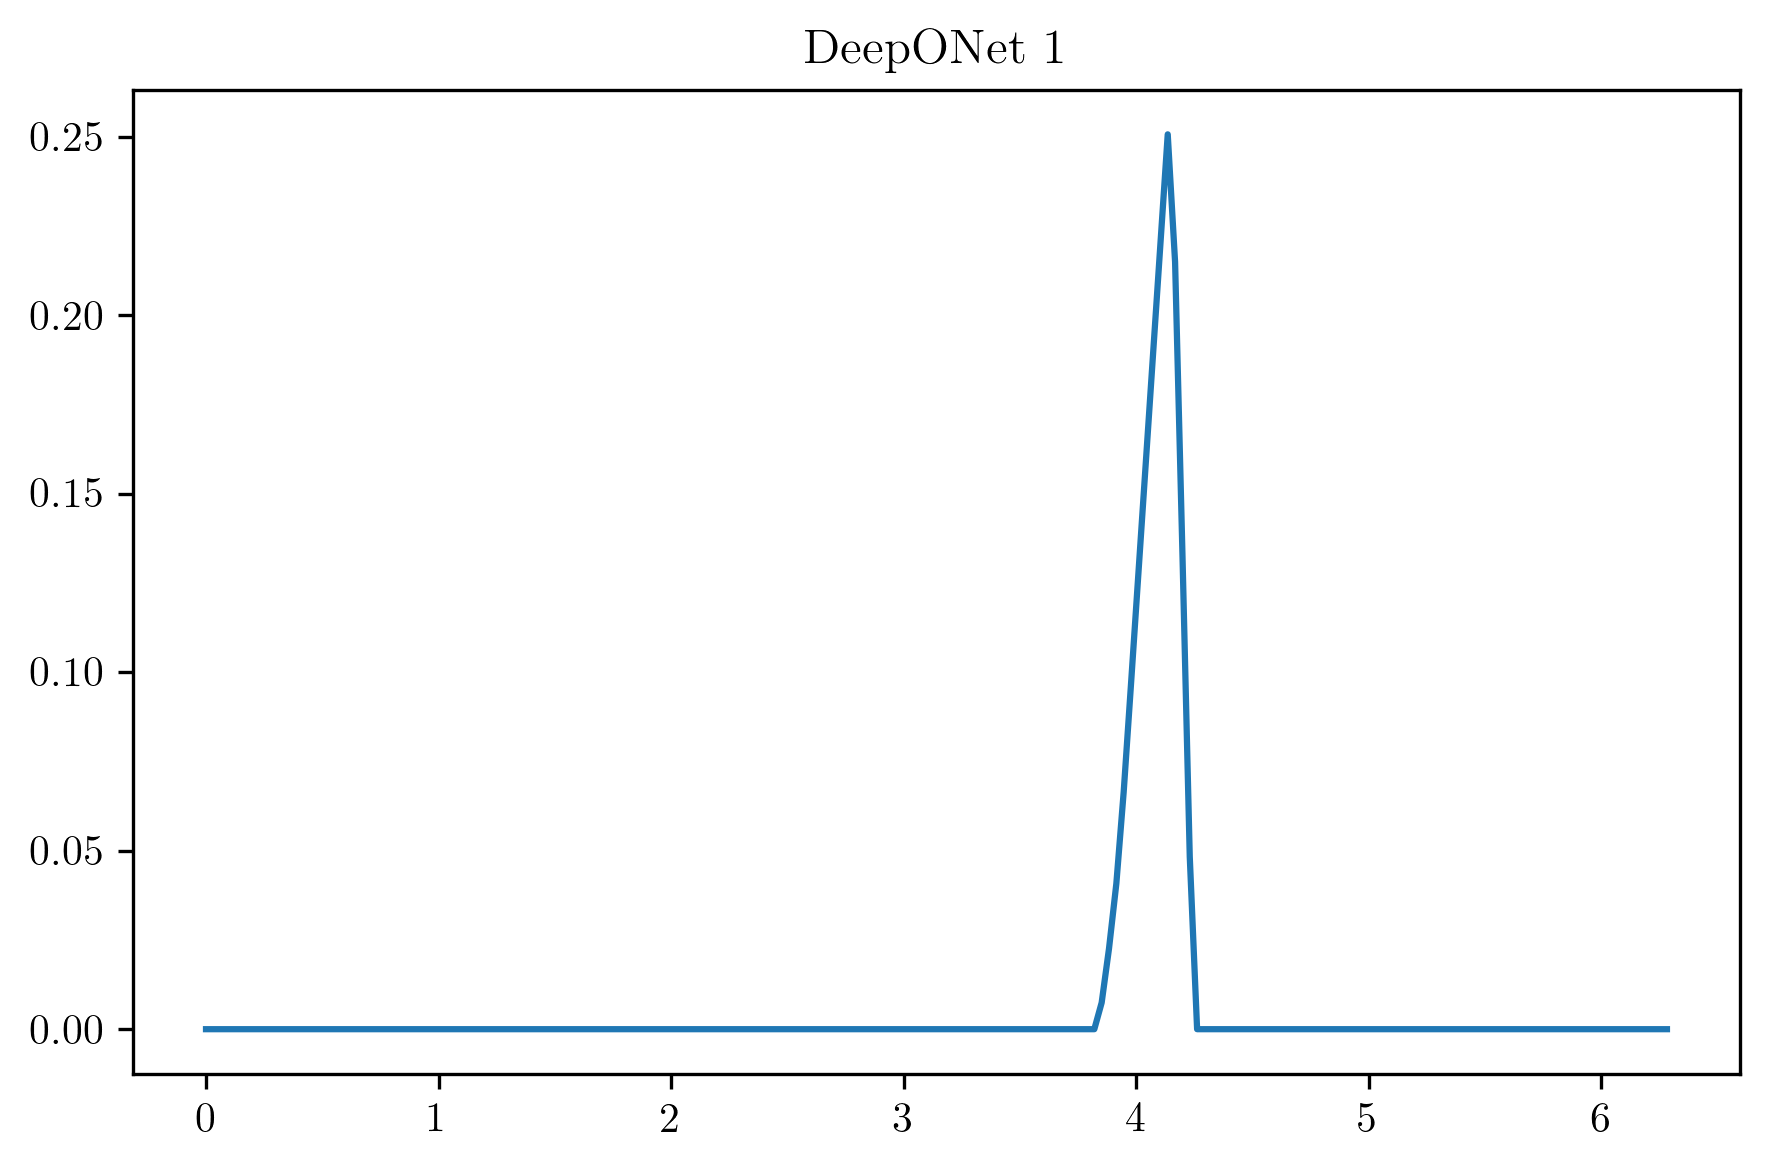

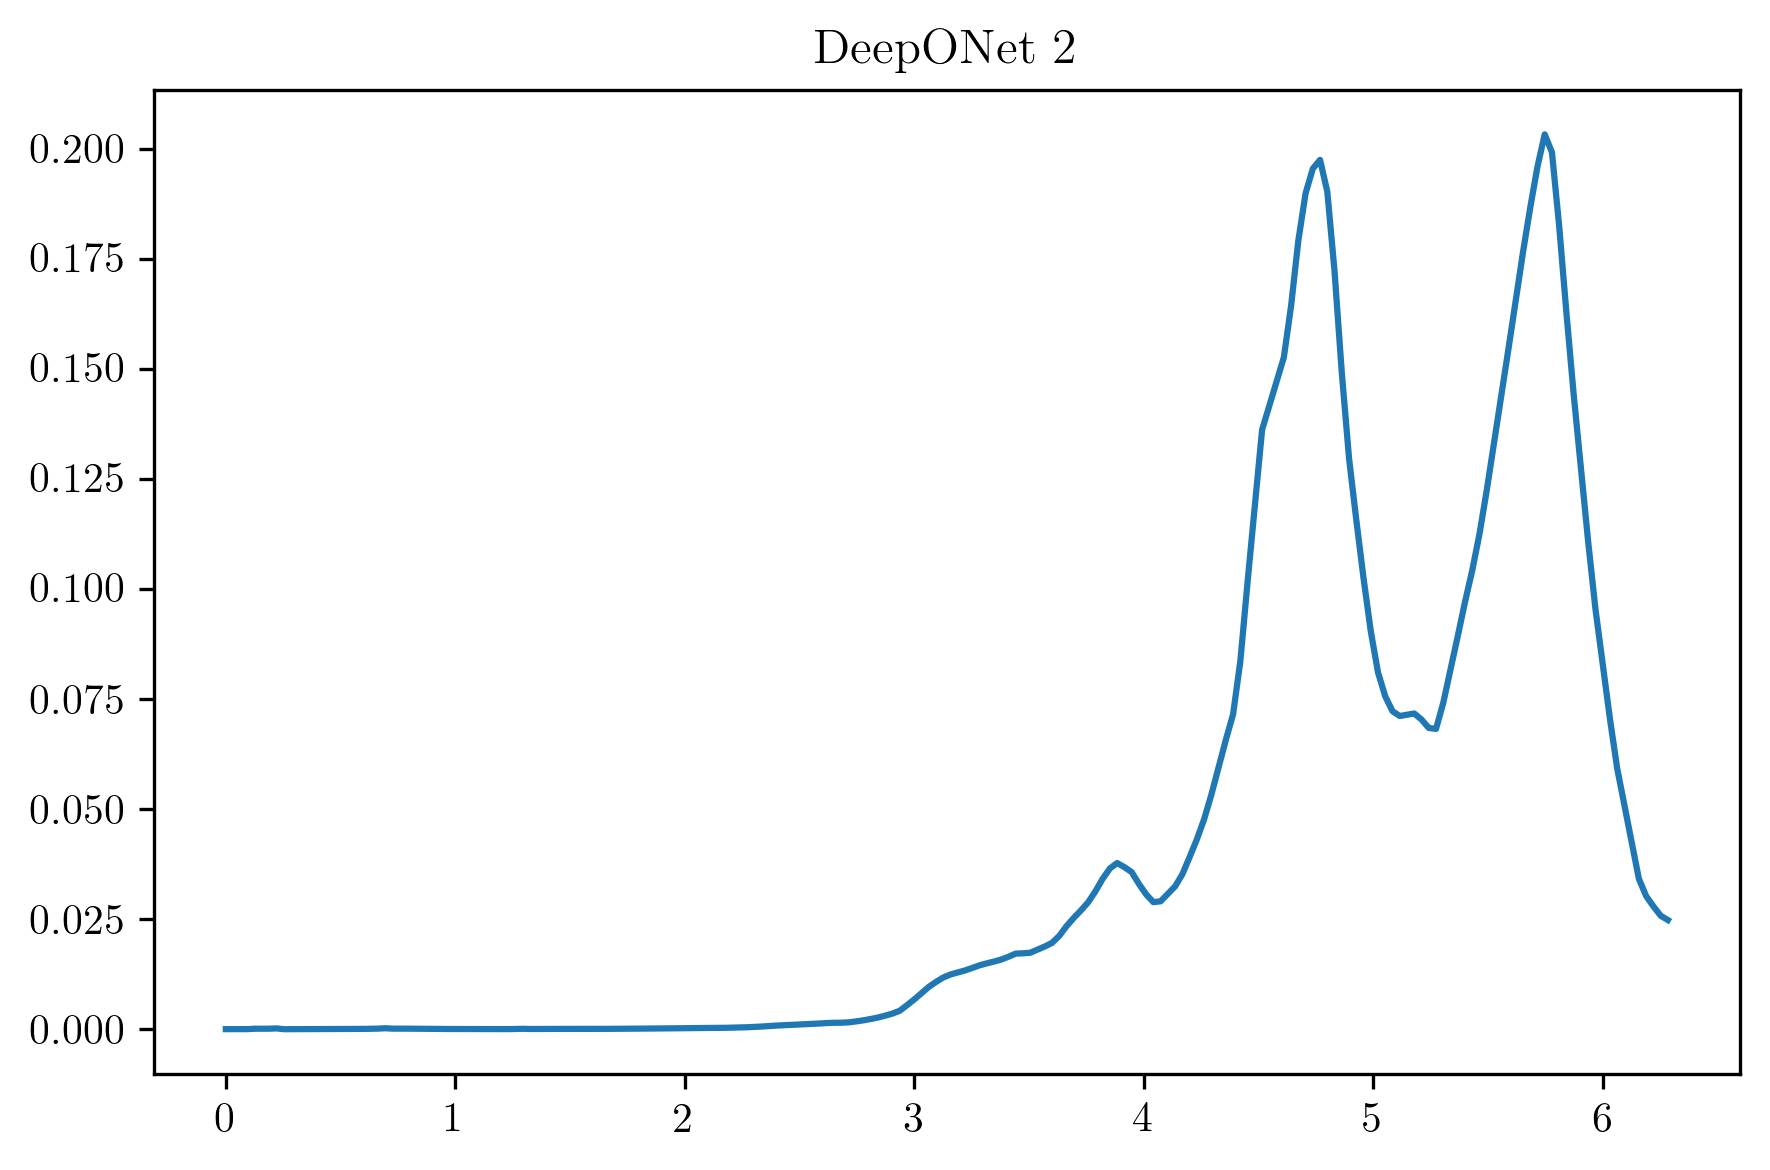

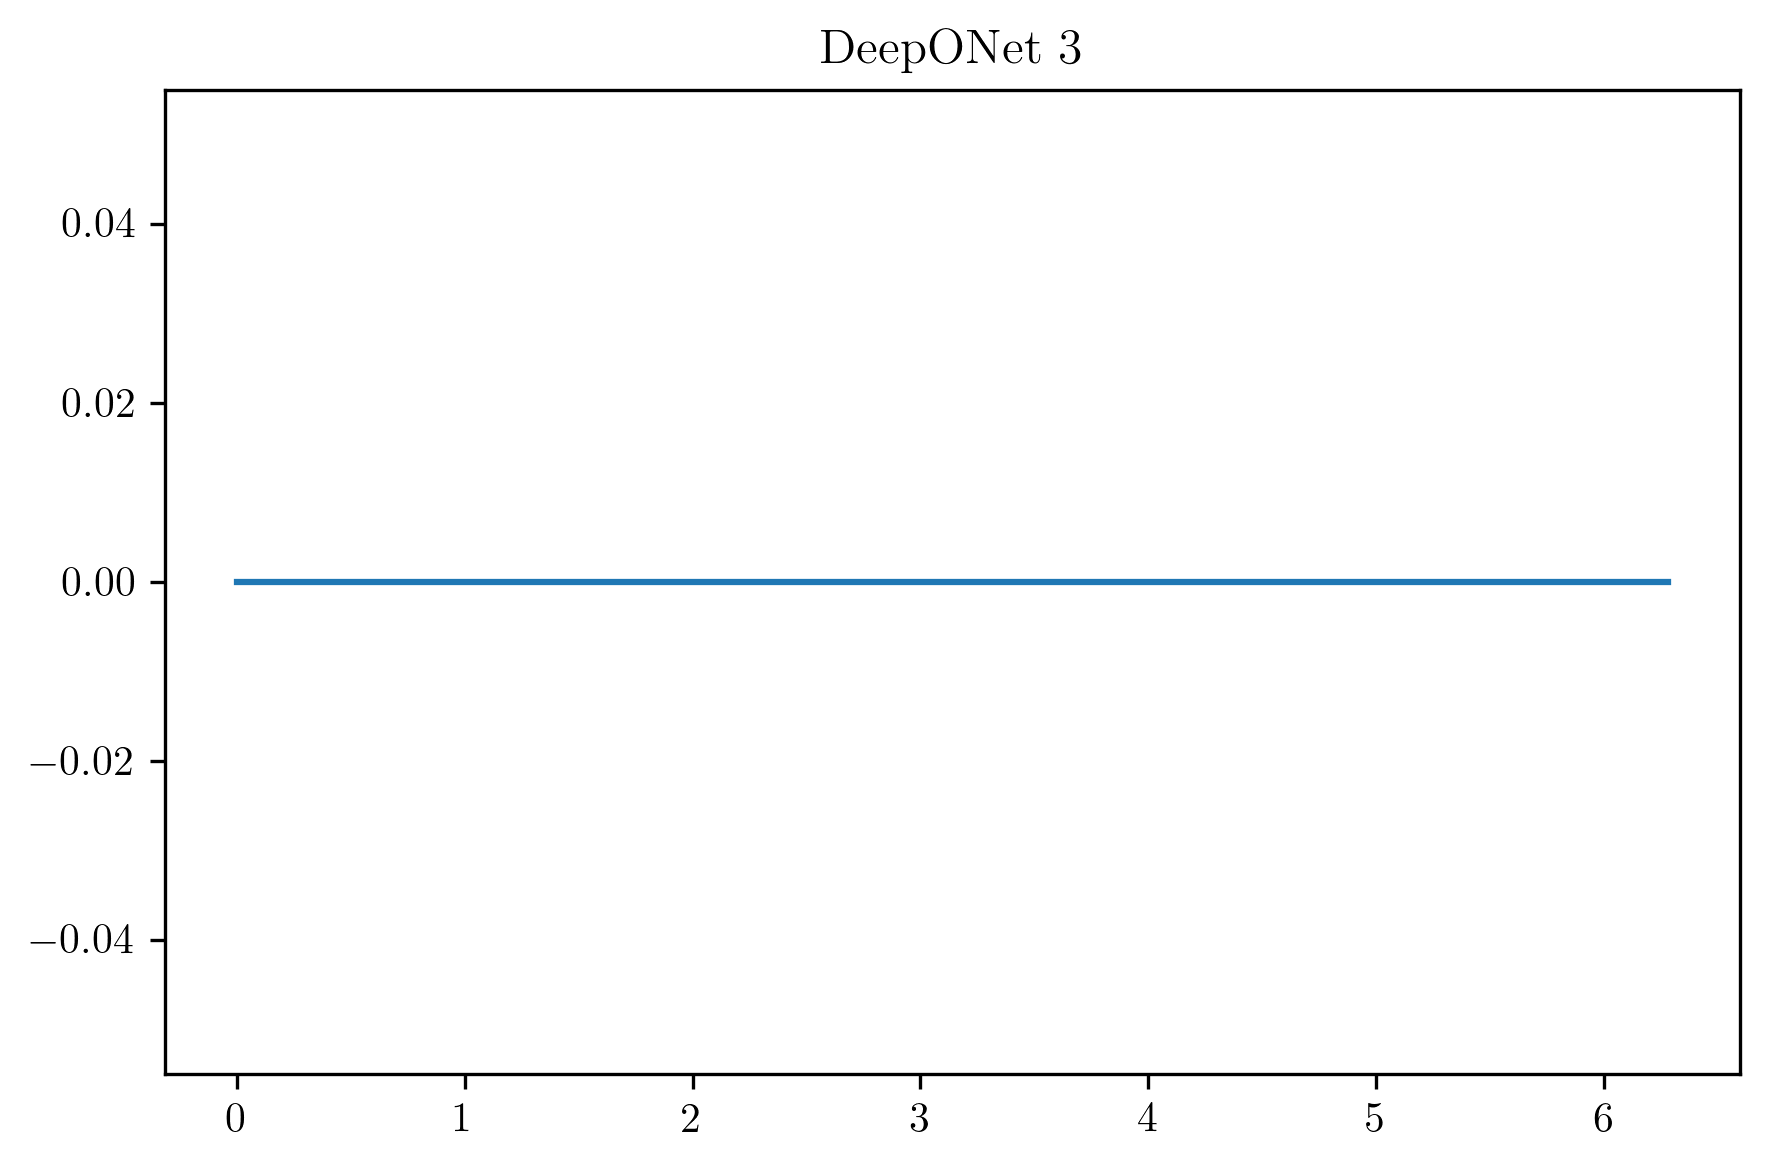

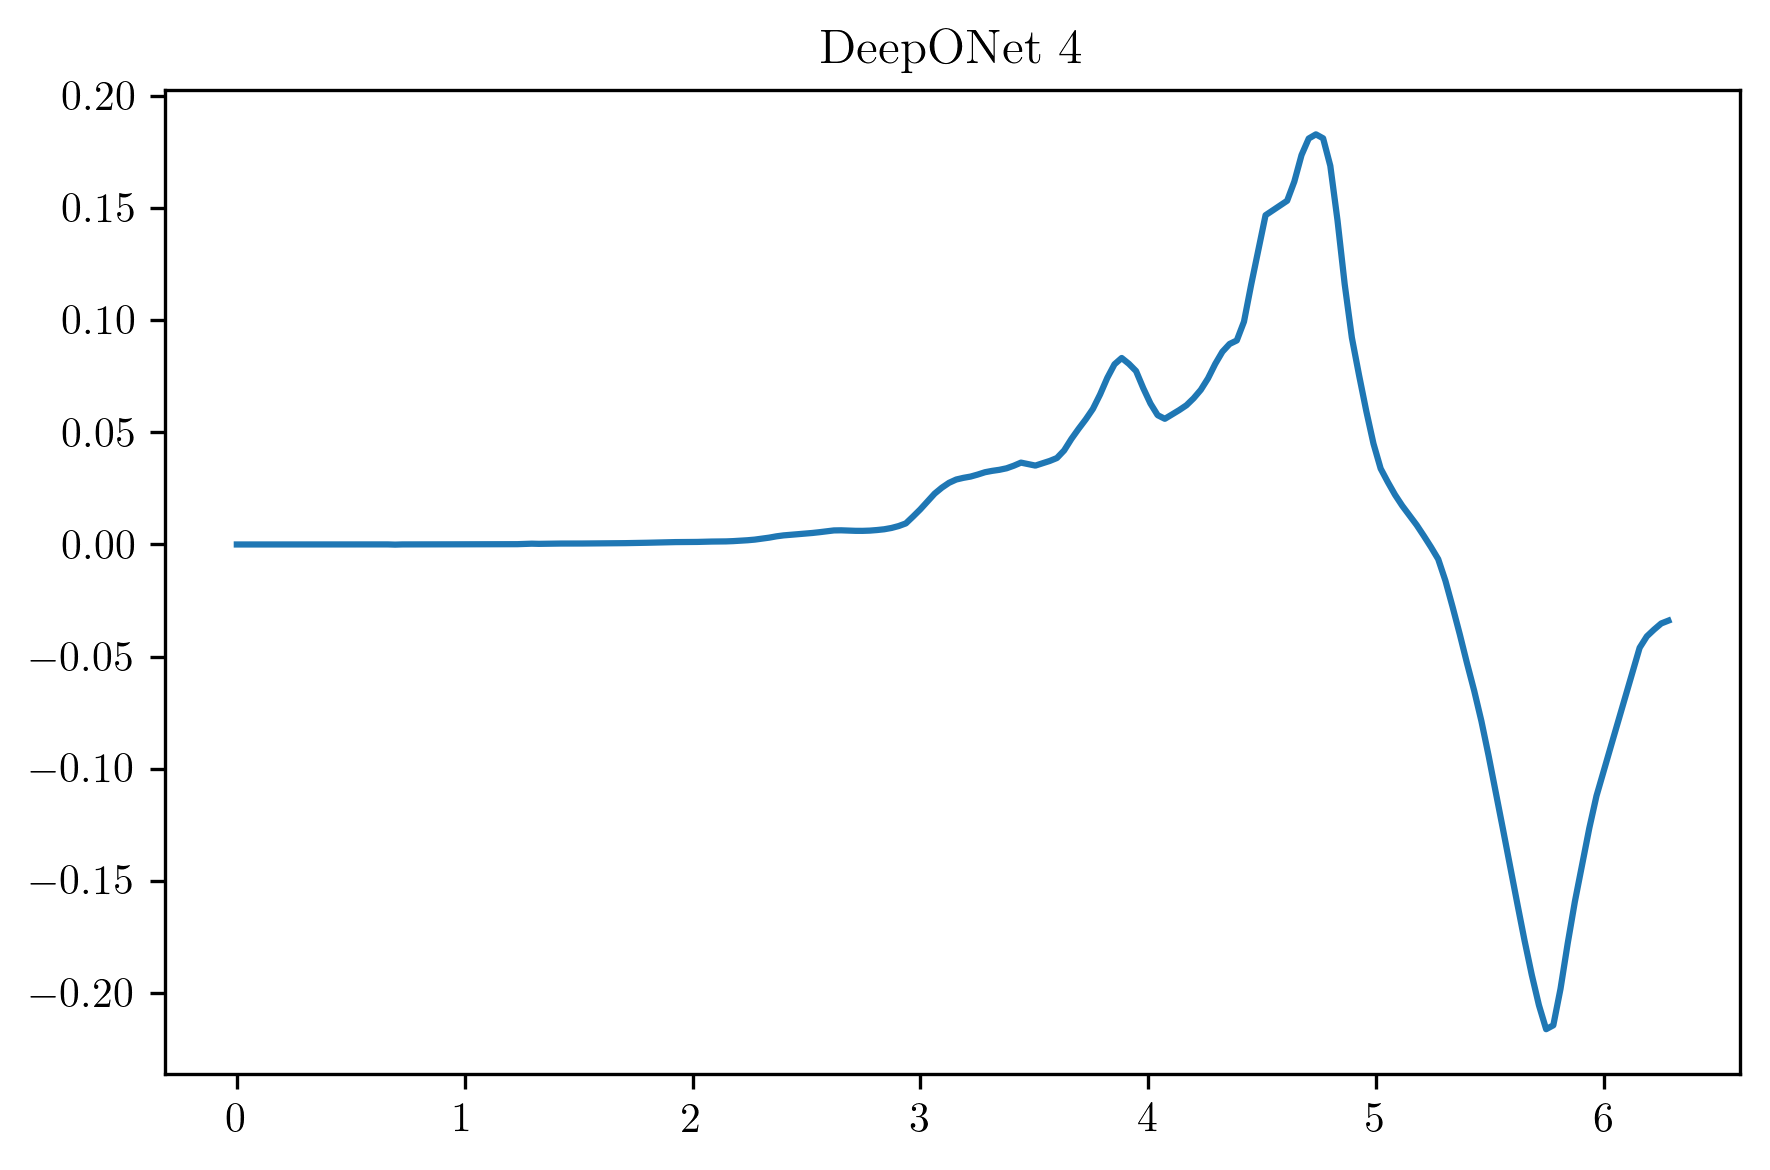

In [11]:
import numpy as np
import matplotlib.pyplot as plt

DeepONetPCA_data = np.load("DeepONetPCA_data.npy")
xgrid = np.linspace(0,2*np.pi,N)

prefix = "./"
fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,0])
plt.title("DeepONet 1")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-0.png")

fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,1])
plt.title("DeepONet 2")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-1.png")

fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,2])
plt.title("DeepONet 3")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-2.png")


fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,3])
plt.title("DeepONet 4")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-3.png")

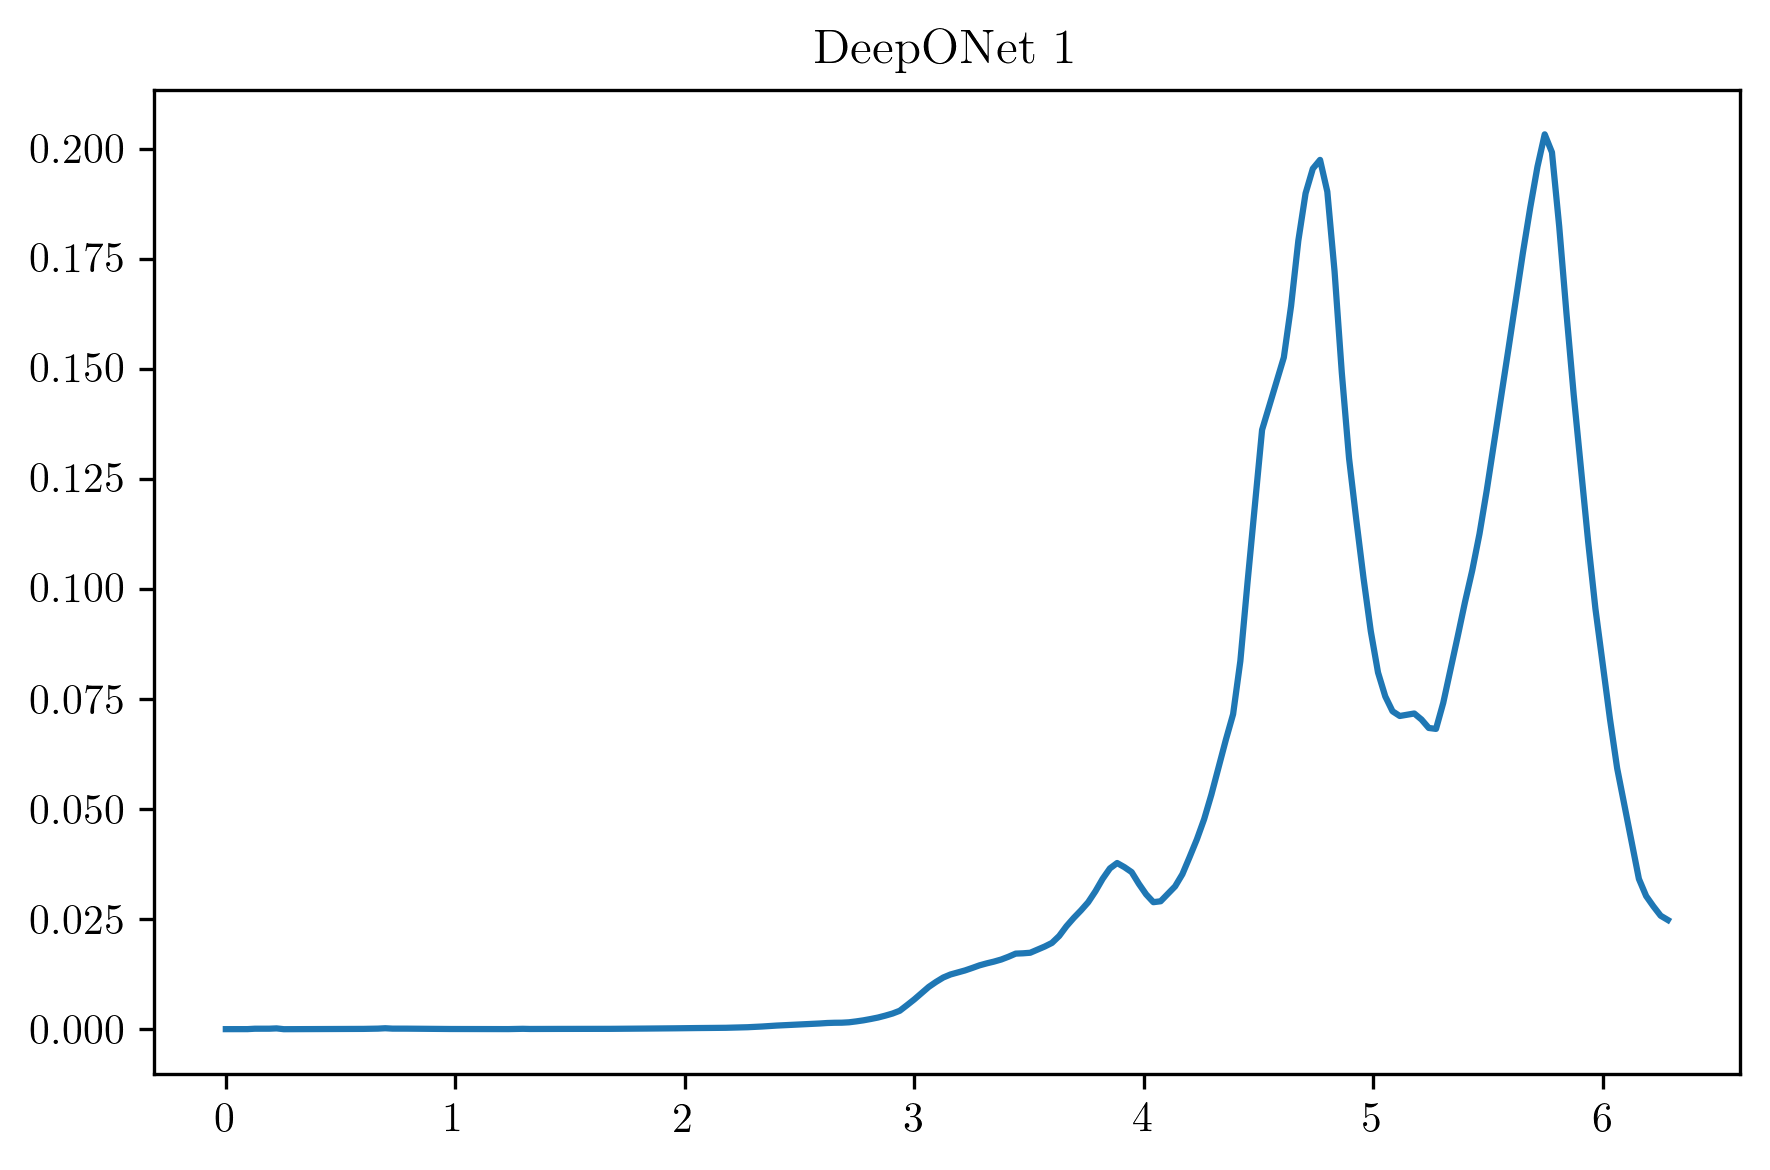

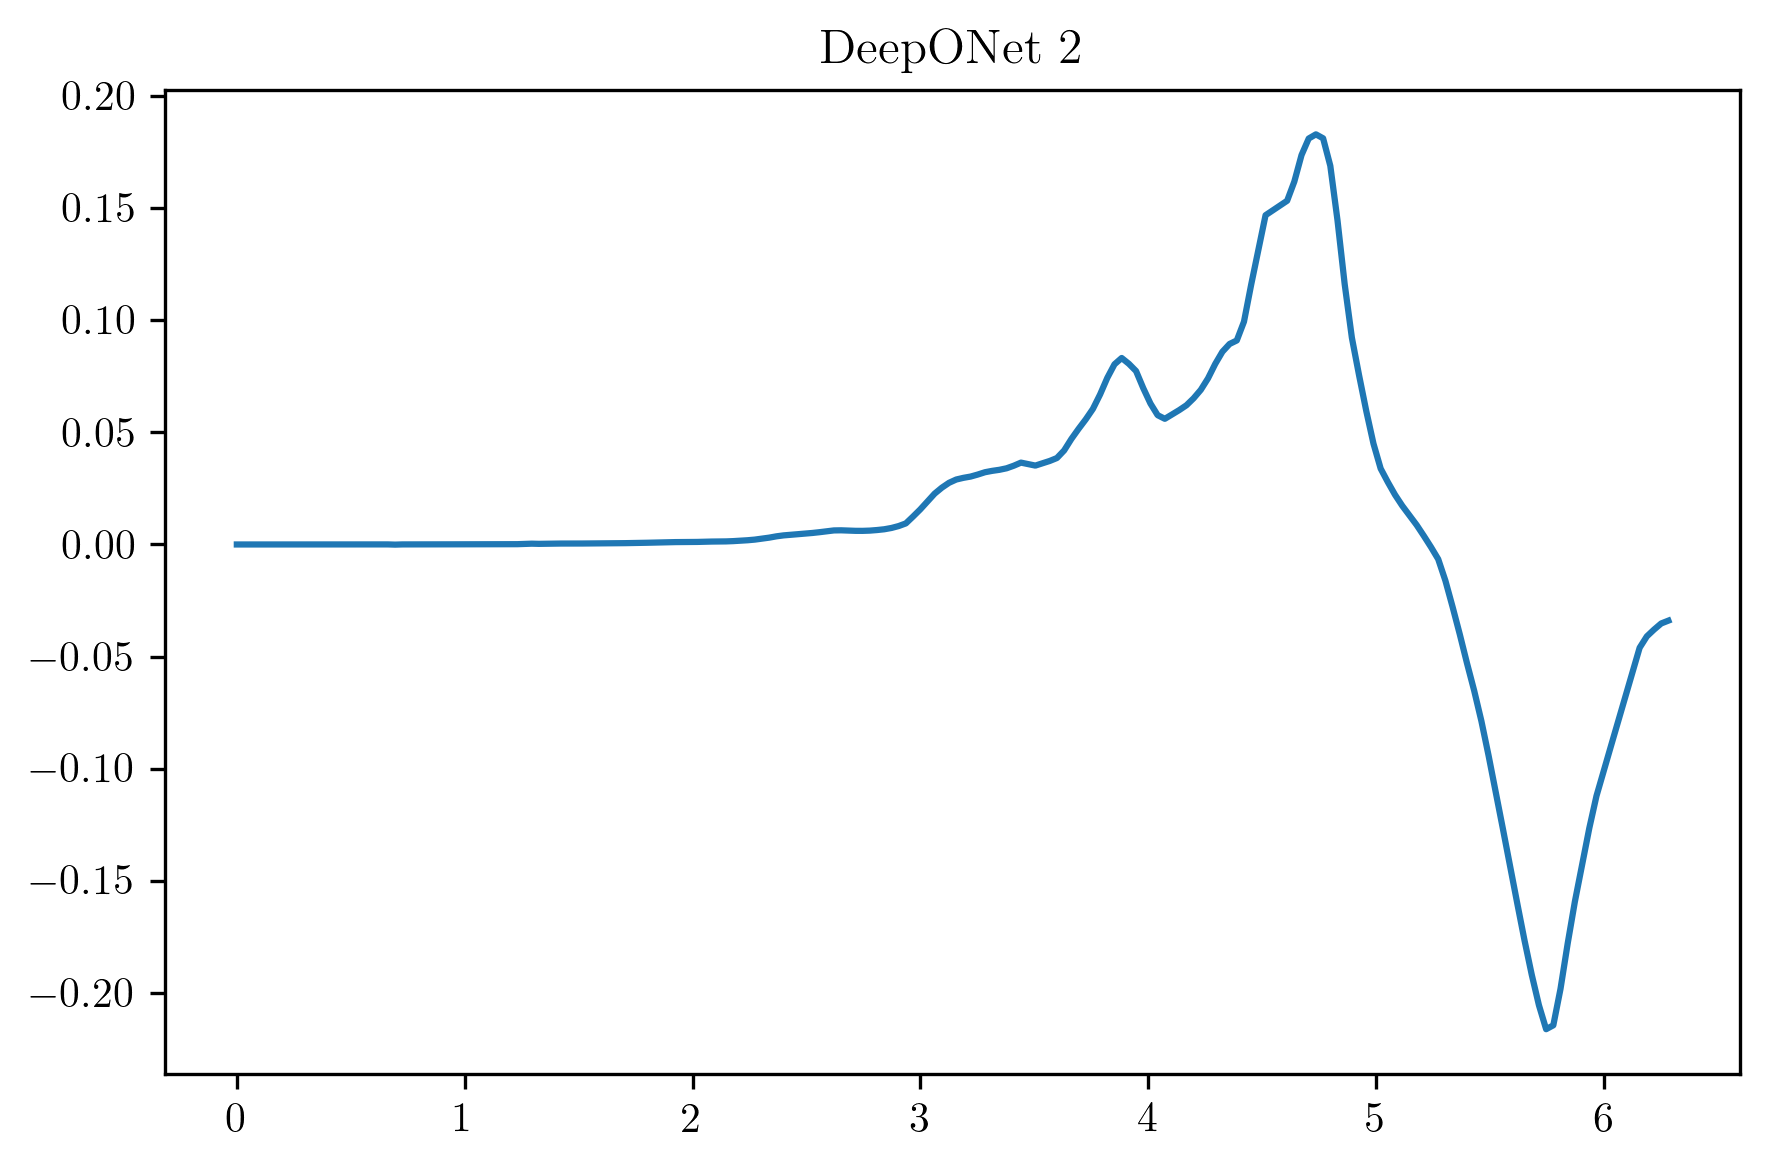

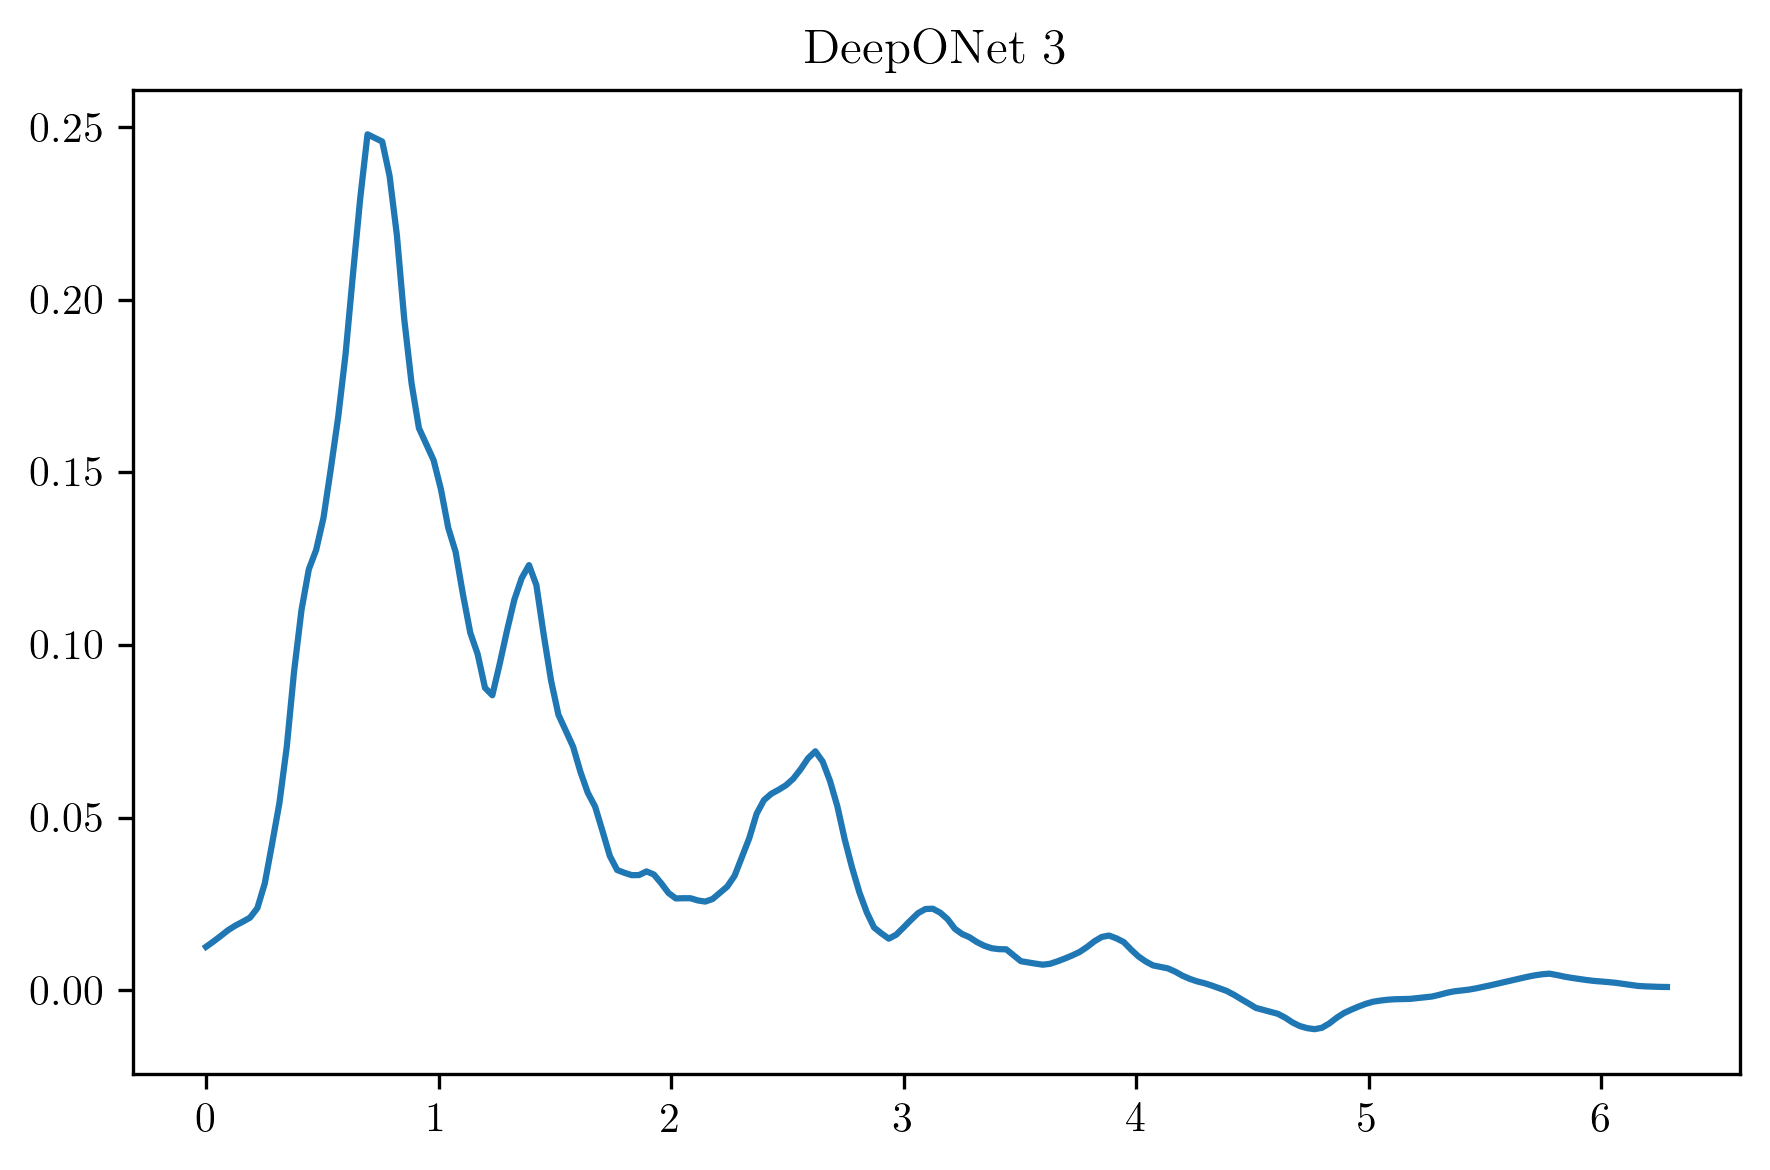

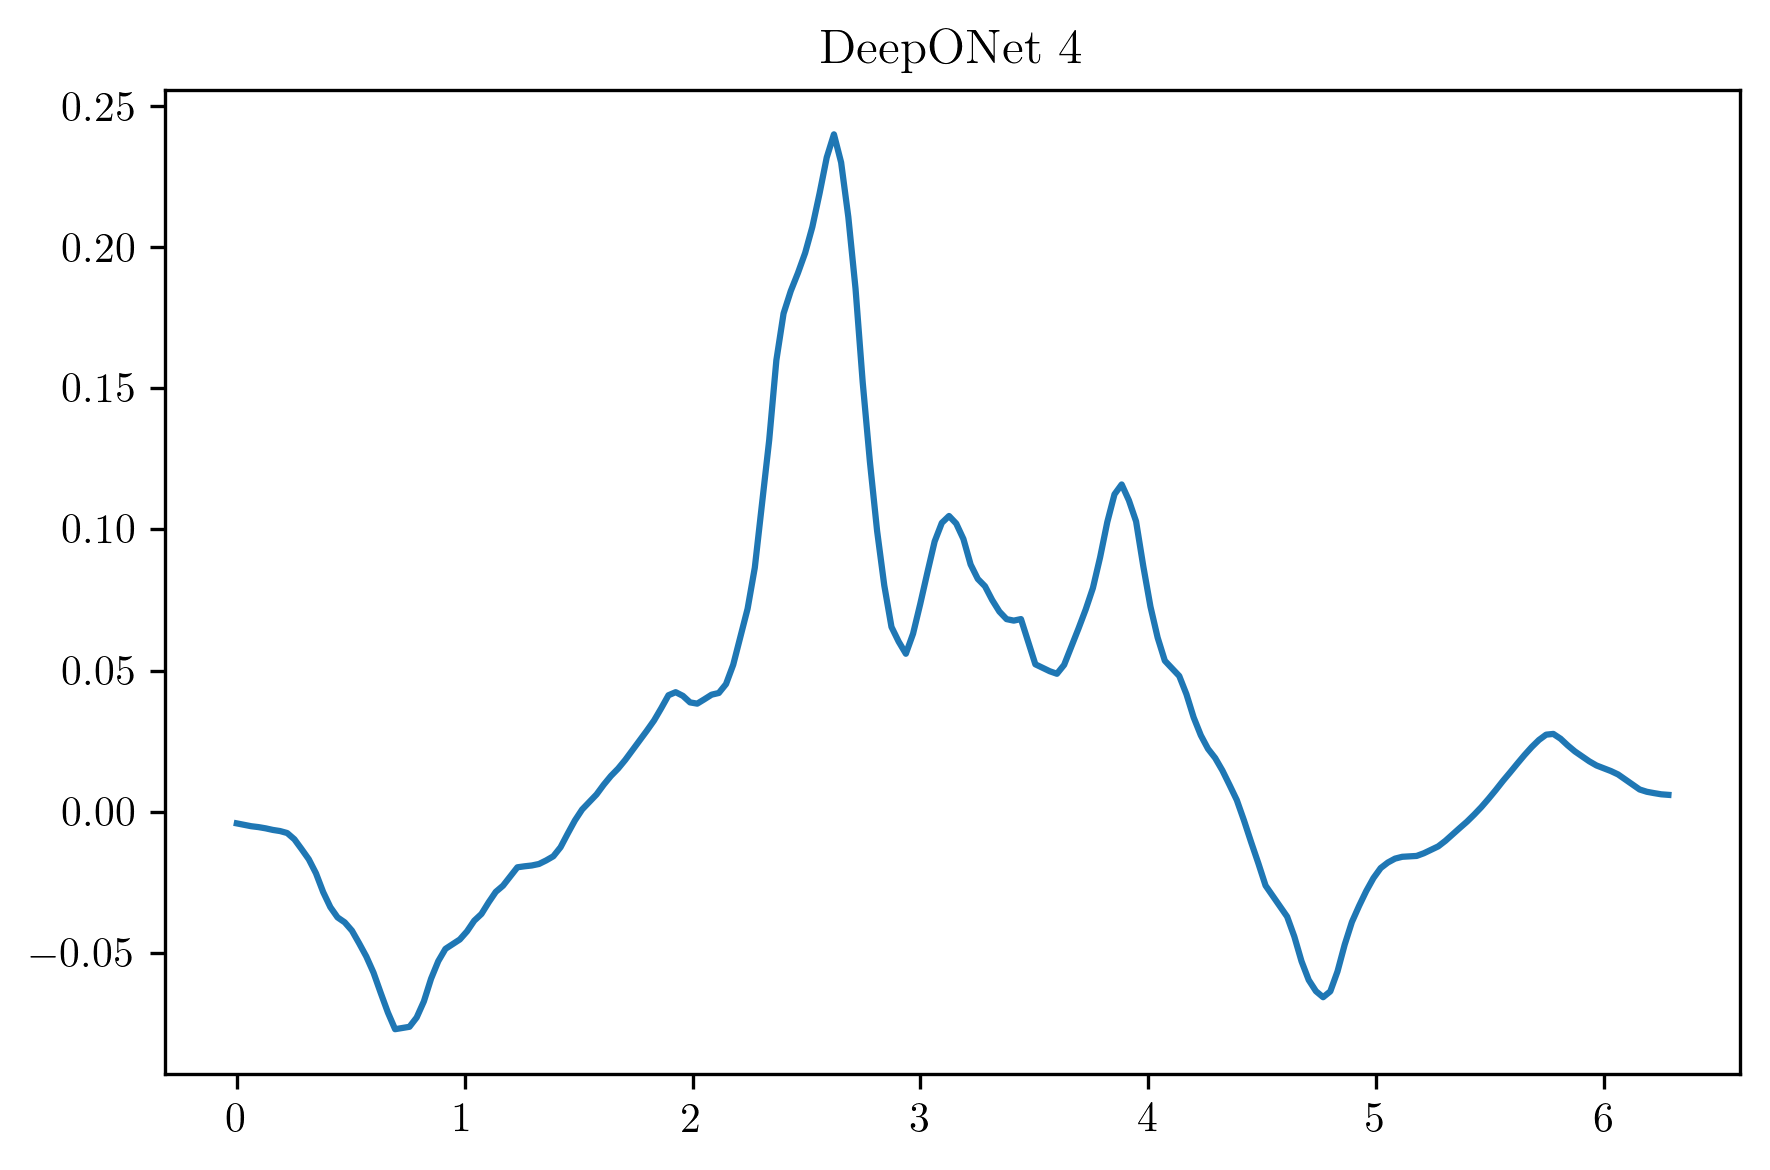

In [12]:



prefix = "./"
fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,1])
plt.title("DeepONet 1")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-PCA-0.png")

fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,3])
plt.title("DeepONet 2")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-PCA-1.png")

fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,5])
plt.title("DeepONet 3")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-PCA-2.png")


fig = plt.figure()
plt.plot(xgrid, DeepONetPCA_data[:,7])
plt.title("DeepONet 4")
fig.tight_layout()
fig.savefig(prefix+problem+"DeepONet-Trunk-PCA-3.png")